# Advanced Methods for Improving the Performance of Convolutional Neural Networks

CSC/DSC 340 Week 11 Slides

Author: [Dr. Julie Butler](http://www.juliebutler.org)

Date Created: October 29, 2023

Last Modified: October 29, 2023

* Last week we learned how to classify the MNIST data set with convolutional neural networks and how to improve the performance of these CNNs with hyperparameter tuning
* This week we will learn how to futher improve the performance using a few preprocessing techniques and a few different architecture styles

* First, let's review the MNIST data set

In [1]:
import tensorflow as tf

# Load MNIST data
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the data
train_images, test_images = train_images / 255.0, test_images / 255.0

# Print the shape of the data
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


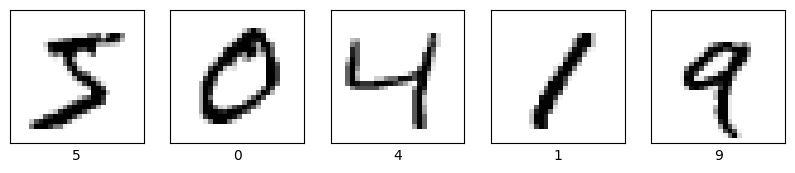

In [2]:
import matplotlib.pyplot as plt
# Display a small number of images
num_images = 5
plt.figure(figsize=(10, 3))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

* Now let's review how to classify the MNIST data set with a simple CNN

In [3]:
from tensorflow.keras import layers, models

# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

del train_images
del test_images

Epoch 1/5


  1/844 [..............................] - ETA: 3:59 - loss: 2.3239 - accuracy: 0.1094

  5/844 [..............................] - ETA: 10s - loss: 2.2586 - accuracy: 0.1312 

 10/844 [..............................] - ETA: 10s - loss: 2.1780 - accuracy: 0.2406

 15/844 [..............................] - ETA: 10s - loss: 2.0323 - accuracy: 0.3510

 20/844 [..............................] - ETA: 9s - loss: 1.8634 - accuracy: 0.4125 

 24/844 [..............................] - ETA: 10s - loss: 1.7469 - accuracy: 0.4531

 29/844 [>.............................] - ETA: 10s - loss: 1.6073 - accuracy: 0.4968

 33/844 [>.............................] - ETA: 10s - loss: 1.5027 - accuracy: 0.5308

 38/844 [>.............................] - ETA: 10s - loss: 1.3988 - accuracy: 0.5654

 43/844 [>.............................] - ETA: 9s - loss: 1.3103 - accuracy: 0.5919 

 48/844 [>.............................] - ETA: 9s - loss: 1.2394 - accuracy: 0.6143

 53/844 [>.............................] - ETA: 9s - loss: 1.1790 - accuracy: 0.6338

 57/844 [=>............................] - ETA: 9s - loss: 1.1349 - accuracy: 0.6456

 62/844 [=>............................] - ETA: 9s - loss: 1.0800 - accuracy: 0.6623

 67/844 [=>............................] - ETA: 9s - loss: 1.0308 - accuracy: 0.6786

 72/844 [=>............................] - ETA: 9s - loss: 0.9853 - accuracy: 0.6934

 77/844 [=>............................] - ETA: 9s - loss: 0.9435 - accuracy: 0.7052

 82/844 [=>............................] - ETA: 9s - loss: 0.9074 - accuracy: 0.7174

 87/844 [==>...........................] - ETA: 9s - loss: 0.8753 - accuracy: 0.7274

 92/844 [==>...........................] - ETA: 9s - loss: 0.8446 - accuracy: 0.7361

 97/844 [==>...........................] - ETA: 9s - loss: 0.8208 - accuracy: 0.7434

101/844 [==>...........................] - ETA: 9s - loss: 0.7999 - accuracy: 0.7500

105/844 [==>...........................] - ETA: 9s - loss: 0.7794 - accuracy: 0.7567

109/844 [==>...........................] - ETA: 9s - loss: 0.7589 - accuracy: 0.7630

114/844 [===>..........................] - ETA: 9s - loss: 0.7381 - accuracy: 0.7700

119/844 [===>..........................] - ETA: 8s - loss: 0.7183 - accuracy: 0.7763

124/844 [===>..........................] - ETA: 8s - loss: 0.7039 - accuracy: 0.7811

129/844 [===>..........................] - ETA: 8s - loss: 0.6856 - accuracy: 0.7868

133/844 [===>..........................] - ETA: 8s - loss: 0.6705 - accuracy: 0.7919

138/844 [===>..........................] - ETA: 8s - loss: 0.6566 - accuracy: 0.7964

143/844 [====>.........................] - ETA: 8s - loss: 0.6413 - accuracy: 0.8012

148/844 [====>.........................] - ETA: 8s - loss: 0.6274 - accuracy: 0.8055

152/844 [====>.........................] - ETA: 8s - loss: 0.6155 - accuracy: 0.8091

156/844 [====>.........................] - ETA: 8s - loss: 0.6052 - accuracy: 0.8123

160/844 [====>.........................] - ETA: 8s - loss: 0.5966 - accuracy: 0.8151

163/844 [====>.........................] - ETA: 8s - loss: 0.5894 - accuracy: 0.8174

166/844 [====>.........................] - ETA: 8s - loss: 0.5821 - accuracy: 0.8196

168/844 [====>.........................] - ETA: 8s - loss: 0.5772 - accuracy: 0.8211

170/844 [=====>........................] - ETA: 8s - loss: 0.5726 - accuracy: 0.8224

172/844 [=====>........................] - ETA: 8s - loss: 0.5681 - accuracy: 0.8239

173/844 [=====>........................] - ETA: 9s - loss: 0.5654 - accuracy: 0.8248

174/844 [=====>........................] - ETA: 9s - loss: 0.5629 - accuracy: 0.8255

175/844 [=====>........................] - ETA: 9s - loss: 0.5607 - accuracy: 0.8263

177/844 [=====>........................] - ETA: 10s - loss: 0.5567 - accuracy: 0.8276

178/844 [=====>........................] - ETA: 10s - loss: 0.5547 - accuracy: 0.8283

180/844 [=====>........................] - ETA: 10s - loss: 0.5506 - accuracy: 0.8294

182/844 [=====>........................] - ETA: 10s - loss: 0.5474 - accuracy: 0.8306

184/844 [=====>........................] - ETA: 10s - loss: 0.5439 - accuracy: 0.8315

186/844 [=====>........................] - ETA: 10s - loss: 0.5397 - accuracy: 0.8328

188/844 [=====>........................] - ETA: 10s - loss: 0.5366 - accuracy: 0.8339

190/844 [=====>........................] - ETA: 10s - loss: 0.5326 - accuracy: 0.8350

192/844 [=====>........................] - ETA: 10s - loss: 0.5290 - accuracy: 0.8360

195/844 [=====>........................] - ETA: 10s - loss: 0.5227 - accuracy: 0.8378

198/844 [======>.......................] - ETA: 10s - loss: 0.5185 - accuracy: 0.8391

200/844 [======>.......................] - ETA: 10s - loss: 0.5151 - accuracy: 0.8401

203/844 [======>.......................] - ETA: 10s - loss: 0.5114 - accuracy: 0.8411

206/844 [======>.......................] - ETA: 10s - loss: 0.5069 - accuracy: 0.8427

209/844 [======>.......................] - ETA: 10s - loss: 0.5020 - accuracy: 0.8441

211/844 [======>.......................] - ETA: 10s - loss: 0.4982 - accuracy: 0.8453

214/844 [======>.......................] - ETA: 10s - loss: 0.4933 - accuracy: 0.8468

216/844 [======>.......................] - ETA: 11s - loss: 0.4902 - accuracy: 0.8476

219/844 [======>.......................] - ETA: 11s - loss: 0.4848 - accuracy: 0.8494

221/844 [======>.......................] - ETA: 11s - loss: 0.4829 - accuracy: 0.8501

223/844 [======>.......................] - ETA: 11s - loss: 0.4797 - accuracy: 0.8510

225/844 [======>.......................] - ETA: 11s - loss: 0.4772 - accuracy: 0.8517

227/844 [=======>......................] - ETA: 11s - loss: 0.4737 - accuracy: 0.8526

229/844 [=======>......................] - ETA: 11s - loss: 0.4708 - accuracy: 0.8536

231/844 [=======>......................] - ETA: 11s - loss: 0.4678 - accuracy: 0.8546

233/844 [=======>......................] - ETA: 11s - loss: 0.4663 - accuracy: 0.8554

235/844 [=======>......................] - ETA: 11s - loss: 0.4642 - accuracy: 0.8560

237/844 [=======>......................] - ETA: 11s - loss: 0.4620 - accuracy: 0.8569

239/844 [=======>......................] - ETA: 11s - loss: 0.4599 - accuracy: 0.8576

240/844 [=======>......................] - ETA: 11s - loss: 0.4587 - accuracy: 0.8581

242/844 [=======>......................] - ETA: 11s - loss: 0.4557 - accuracy: 0.8589

244/844 [=======>......................] - ETA: 11s - loss: 0.4533 - accuracy: 0.8597

245/844 [=======>......................] - ETA: 11s - loss: 0.4521 - accuracy: 0.8601

247/844 [=======>......................] - ETA: 11s - loss: 0.4502 - accuracy: 0.8607

249/844 [=======>......................] - ETA: 11s - loss: 0.4477 - accuracy: 0.8614

251/844 [=======>......................] - ETA: 11s - loss: 0.4452 - accuracy: 0.8622

253/844 [=======>......................] - ETA: 11s - loss: 0.4429 - accuracy: 0.8630

255/844 [========>.....................] - ETA: 11s - loss: 0.4407 - accuracy: 0.8635

256/844 [========>.....................] - ETA: 11s - loss: 0.4396 - accuracy: 0.8639

258/844 [========>.....................] - ETA: 11s - loss: 0.4377 - accuracy: 0.8644

260/844 [========>.....................] - ETA: 12s - loss: 0.4359 - accuracy: 0.8650

262/844 [========>.....................] - ETA: 12s - loss: 0.4334 - accuracy: 0.8657

264/844 [========>.....................] - ETA: 12s - loss: 0.4311 - accuracy: 0.8663

266/844 [========>.....................] - ETA: 12s - loss: 0.4290 - accuracy: 0.8669

268/844 [========>.....................] - ETA: 12s - loss: 0.4266 - accuracy: 0.8676

270/844 [========>.....................] - ETA: 12s - loss: 0.4248 - accuracy: 0.8681

272/844 [========>.....................] - ETA: 12s - loss: 0.4230 - accuracy: 0.8686

274/844 [========>.....................] - ETA: 12s - loss: 0.4207 - accuracy: 0.8693

276/844 [========>.....................] - ETA: 12s - loss: 0.4193 - accuracy: 0.8698

278/844 [========>.....................] - ETA: 12s - loss: 0.4177 - accuracy: 0.8701

280/844 [========>.....................] - ETA: 12s - loss: 0.4154 - accuracy: 0.8708

282/844 [=========>....................] - ETA: 12s - loss: 0.4134 - accuracy: 0.8714

284/844 [=========>....................] - ETA: 12s - loss: 0.4114 - accuracy: 0.8721

286/844 [=========>....................] - ETA: 12s - loss: 0.4107 - accuracy: 0.8724

288/844 [=========>....................] - ETA: 12s - loss: 0.4085 - accuracy: 0.8731

291/844 [=========>....................] - ETA: 12s - loss: 0.4064 - accuracy: 0.8739

293/844 [=========>....................] - ETA: 12s - loss: 0.4045 - accuracy: 0.8745

296/844 [=========>....................] - ETA: 12s - loss: 0.4016 - accuracy: 0.8754

299/844 [=========>....................] - ETA: 11s - loss: 0.3983 - accuracy: 0.8765

302/844 [=========>....................] - ETA: 11s - loss: 0.3957 - accuracy: 0.8772

305/844 [=========>....................] - ETA: 11s - loss: 0.3931 - accuracy: 0.8780

308/844 [=========>....................] - ETA: 11s - loss: 0.3912 - accuracy: 0.8788

311/844 [==========>...................] - ETA: 11s - loss: 0.3885 - accuracy: 0.8796

314/844 [==========>...................] - ETA: 11s - loss: 0.3864 - accuracy: 0.8803

317/844 [==========>...................] - ETA: 11s - loss: 0.3839 - accuracy: 0.8811

320/844 [==========>...................] - ETA: 11s - loss: 0.3817 - accuracy: 0.8819

322/844 [==========>...................] - ETA: 11s - loss: 0.3805 - accuracy: 0.8821

324/844 [==========>...................] - ETA: 11s - loss: 0.3793 - accuracy: 0.8825

326/844 [==========>...................] - ETA: 11s - loss: 0.3773 - accuracy: 0.8831

328/844 [==========>...................] - ETA: 11s - loss: 0.3759 - accuracy: 0.8836

330/844 [==========>...................] - ETA: 11s - loss: 0.3742 - accuracy: 0.8841

333/844 [==========>...................] - ETA: 11s - loss: 0.3723 - accuracy: 0.8847

336/844 [==========>...................] - ETA: 11s - loss: 0.3700 - accuracy: 0.8854

339/844 [===========>..................] - ETA: 11s - loss: 0.3683 - accuracy: 0.8860

342/844 [===========>..................] - ETA: 11s - loss: 0.3664 - accuracy: 0.8867

345/844 [===========>..................] - ETA: 11s - loss: 0.3643 - accuracy: 0.8875

347/844 [===========>..................] - ETA: 11s - loss: 0.3629 - accuracy: 0.8879

349/844 [===========>..................] - ETA: 11s - loss: 0.3616 - accuracy: 0.8883

351/844 [===========>..................] - ETA: 11s - loss: 0.3599 - accuracy: 0.8888

353/844 [===========>..................] - ETA: 11s - loss: 0.3589 - accuracy: 0.8891

355/844 [===========>..................] - ETA: 11s - loss: 0.3576 - accuracy: 0.8895

357/844 [===========>..................] - ETA: 11s - loss: 0.3560 - accuracy: 0.8901

359/844 [===========>..................] - ETA: 11s - loss: 0.3549 - accuracy: 0.8903

362/844 [===========>..................] - ETA: 10s - loss: 0.3532 - accuracy: 0.8908

364/844 [===========>..................] - ETA: 10s - loss: 0.3524 - accuracy: 0.8910

366/844 [============>.................] - ETA: 10s - loss: 0.3512 - accuracy: 0.8914

368/844 [============>.................] - ETA: 10s - loss: 0.3501 - accuracy: 0.8916

370/844 [============>.................] - ETA: 10s - loss: 0.3492 - accuracy: 0.8919

372/844 [============>.................] - ETA: 10s - loss: 0.3480 - accuracy: 0.8923

374/844 [============>.................] - ETA: 10s - loss: 0.3472 - accuracy: 0.8926

376/844 [============>.................] - ETA: 10s - loss: 0.3459 - accuracy: 0.8930

378/844 [============>.................] - ETA: 10s - loss: 0.3444 - accuracy: 0.8935

380/844 [============>.................] - ETA: 10s - loss: 0.3434 - accuracy: 0.8939

382/844 [============>.................] - ETA: 10s - loss: 0.3422 - accuracy: 0.8942

385/844 [============>.................] - ETA: 10s - loss: 0.3402 - accuracy: 0.8948

388/844 [============>.................] - ETA: 10s - loss: 0.3383 - accuracy: 0.8955

390/844 [============>.................] - ETA: 10s - loss: 0.3370 - accuracy: 0.8958

393/844 [============>.................] - ETA: 10s - loss: 0.3353 - accuracy: 0.8964

395/844 [=============>................] - ETA: 10s - loss: 0.3343 - accuracy: 0.8968

397/844 [=============>................] - ETA: 10s - loss: 0.3334 - accuracy: 0.8970

399/844 [=============>................] - ETA: 10s - loss: 0.3323 - accuracy: 0.8974

402/844 [=============>................] - ETA: 10s - loss: 0.3309 - accuracy: 0.8978

405/844 [=============>................] - ETA: 10s - loss: 0.3289 - accuracy: 0.8984

408/844 [=============>................] - ETA: 10s - loss: 0.3278 - accuracy: 0.8987

411/844 [=============>................] - ETA: 9s - loss: 0.3261 - accuracy: 0.8992 

414/844 [=============>................] - ETA: 9s - loss: 0.3244 - accuracy: 0.8998

417/844 [=============>................] - ETA: 9s - loss: 0.3226 - accuracy: 0.9004

420/844 [=============>................] - ETA: 9s - loss: 0.3212 - accuracy: 0.9008

422/844 [==============>...............] - ETA: 9s - loss: 0.3205 - accuracy: 0.9010

425/844 [==============>...............] - ETA: 9s - loss: 0.3188 - accuracy: 0.9015

428/844 [==============>...............] - ETA: 9s - loss: 0.3171 - accuracy: 0.9020

431/844 [==============>...............] - ETA: 9s - loss: 0.3157 - accuracy: 0.9025

433/844 [==============>...............] - ETA: 9s - loss: 0.3149 - accuracy: 0.9029

435/844 [==============>...............] - ETA: 9s - loss: 0.3138 - accuracy: 0.9032

437/844 [==============>...............] - ETA: 9s - loss: 0.3127 - accuracy: 0.9036

439/844 [==============>...............] - ETA: 9s - loss: 0.3120 - accuracy: 0.9038

441/844 [==============>...............] - ETA: 9s - loss: 0.3111 - accuracy: 0.9039

444/844 [==============>...............] - ETA: 9s - loss: 0.3099 - accuracy: 0.9044

447/844 [==============>...............] - ETA: 9s - loss: 0.3085 - accuracy: 0.9048

450/844 [==============>...............] - ETA: 9s - loss: 0.3072 - accuracy: 0.9052

452/844 [===============>..............] - ETA: 9s - loss: 0.3061 - accuracy: 0.9055

454/844 [===============>..............] - ETA: 9s - loss: 0.3051 - accuracy: 0.9058

457/844 [===============>..............] - ETA: 8s - loss: 0.3037 - accuracy: 0.9061

460/844 [===============>..............] - ETA: 8s - loss: 0.3022 - accuracy: 0.9067

462/844 [===============>..............] - ETA: 8s - loss: 0.3014 - accuracy: 0.9070

464/844 [===============>..............] - ETA: 8s - loss: 0.3004 - accuracy: 0.9073

467/844 [===============>..............] - ETA: 8s - loss: 0.2989 - accuracy: 0.9077

470/844 [===============>..............] - ETA: 8s - loss: 0.2973 - accuracy: 0.9082

473/844 [===============>..............] - ETA: 8s - loss: 0.2961 - accuracy: 0.9086

476/844 [===============>..............] - ETA: 8s - loss: 0.2948 - accuracy: 0.9091

479/844 [================>.............] - ETA: 8s - loss: 0.2937 - accuracy: 0.9094

482/844 [================>.............] - ETA: 8s - loss: 0.2922 - accuracy: 0.9098

485/844 [================>.............] - ETA: 8s - loss: 0.2911 - accuracy: 0.9102

488/844 [================>.............] - ETA: 8s - loss: 0.2899 - accuracy: 0.9105

491/844 [================>.............] - ETA: 8s - loss: 0.2886 - accuracy: 0.9108

494/844 [================>.............] - ETA: 8s - loss: 0.2874 - accuracy: 0.9112

497/844 [================>.............] - ETA: 8s - loss: 0.2860 - accuracy: 0.9116

500/844 [================>.............] - ETA: 7s - loss: 0.2848 - accuracy: 0.9120

503/844 [================>.............] - ETA: 7s - loss: 0.2836 - accuracy: 0.9124

506/844 [================>.............] - ETA: 7s - loss: 0.2828 - accuracy: 0.9127

509/844 [=================>............] - ETA: 7s - loss: 0.2817 - accuracy: 0.9130

512/844 [=================>............] - ETA: 7s - loss: 0.2806 - accuracy: 0.9134

515/844 [=================>............] - ETA: 7s - loss: 0.2794 - accuracy: 0.9138

518/844 [=================>............] - ETA: 7s - loss: 0.2783 - accuracy: 0.9141

521/844 [=================>............] - ETA: 7s - loss: 0.2771 - accuracy: 0.9145

524/844 [=================>............] - ETA: 7s - loss: 0.2761 - accuracy: 0.9147

527/844 [=================>............] - ETA: 7s - loss: 0.2752 - accuracy: 0.9150

530/844 [=================>............] - ETA: 7s - loss: 0.2744 - accuracy: 0.9153

533/844 [=================>............] - ETA: 7s - loss: 0.2738 - accuracy: 0.9156

536/844 [==================>...........] - ETA: 7s - loss: 0.2726 - accuracy: 0.9160

539/844 [==================>...........] - ETA: 6s - loss: 0.2716 - accuracy: 0.9163

542/844 [==================>...........] - ETA: 6s - loss: 0.2712 - accuracy: 0.9164

545/844 [==================>...........] - ETA: 6s - loss: 0.2704 - accuracy: 0.9167

548/844 [==================>...........] - ETA: 6s - loss: 0.2692 - accuracy: 0.9170

551/844 [==================>...........] - ETA: 6s - loss: 0.2682 - accuracy: 0.9173

554/844 [==================>...........] - ETA: 6s - loss: 0.2677 - accuracy: 0.9174

557/844 [==================>...........] - ETA: 6s - loss: 0.2667 - accuracy: 0.9177

560/844 [==================>...........] - ETA: 6s - loss: 0.2655 - accuracy: 0.9180

563/844 [===================>..........] - ETA: 6s - loss: 0.2645 - accuracy: 0.9183

566/844 [===================>..........] - ETA: 6s - loss: 0.2635 - accuracy: 0.9187

569/844 [===================>..........] - ETA: 6s - loss: 0.2628 - accuracy: 0.9188

572/844 [===================>..........] - ETA: 6s - loss: 0.2619 - accuracy: 0.9191

575/844 [===================>..........] - ETA: 6s - loss: 0.2613 - accuracy: 0.9193

578/844 [===================>..........] - ETA: 6s - loss: 0.2605 - accuracy: 0.9196

581/844 [===================>..........] - ETA: 5s - loss: 0.2597 - accuracy: 0.9198

584/844 [===================>..........] - ETA: 5s - loss: 0.2592 - accuracy: 0.9200

587/844 [===================>..........] - ETA: 5s - loss: 0.2582 - accuracy: 0.9203

590/844 [===================>..........] - ETA: 5s - loss: 0.2571 - accuracy: 0.9207

593/844 [====================>.........] - ETA: 5s - loss: 0.2562 - accuracy: 0.9209

596/844 [====================>.........] - ETA: 5s - loss: 0.2553 - accuracy: 0.9212

599/844 [====================>.........] - ETA: 5s - loss: 0.2545 - accuracy: 0.9214

601/844 [====================>.........] - ETA: 5s - loss: 0.2539 - accuracy: 0.9216

603/844 [====================>.........] - ETA: 5s - loss: 0.2536 - accuracy: 0.9217

605/844 [====================>.........] - ETA: 5s - loss: 0.2531 - accuracy: 0.9218

608/844 [====================>.........] - ETA: 5s - loss: 0.2522 - accuracy: 0.9221

611/844 [====================>.........] - ETA: 5s - loss: 0.2513 - accuracy: 0.9224

614/844 [====================>.........] - ETA: 5s - loss: 0.2503 - accuracy: 0.9227

617/844 [====================>.........] - ETA: 5s - loss: 0.2496 - accuracy: 0.9230

620/844 [=====================>........] - ETA: 5s - loss: 0.2486 - accuracy: 0.9233

623/844 [=====================>........] - ETA: 5s - loss: 0.2478 - accuracy: 0.9235

625/844 [=====================>........] - ETA: 4s - loss: 0.2471 - accuracy: 0.9237

627/844 [=====================>........] - ETA: 4s - loss: 0.2465 - accuracy: 0.9239

628/844 [=====================>........] - ETA: 4s - loss: 0.2462 - accuracy: 0.9240

630/844 [=====================>........] - ETA: 4s - loss: 0.2457 - accuracy: 0.9241

632/844 [=====================>........] - ETA: 4s - loss: 0.2453 - accuracy: 0.9242

634/844 [=====================>........] - ETA: 4s - loss: 0.2445 - accuracy: 0.9245

635/844 [=====================>........] - ETA: 4s - loss: 0.2444 - accuracy: 0.9245

636/844 [=====================>........] - ETA: 4s - loss: 0.2441 - accuracy: 0.9246

637/844 [=====================>........] - ETA: 4s - loss: 0.2441 - accuracy: 0.9246

639/844 [=====================>........] - ETA: 4s - loss: 0.2435 - accuracy: 0.9248

641/844 [=====================>........] - ETA: 4s - loss: 0.2431 - accuracy: 0.9249

643/844 [=====================>........] - ETA: 4s - loss: 0.2425 - accuracy: 0.9251

645/844 [=====================>........] - ETA: 4s - loss: 0.2419 - accuracy: 0.9252

646/844 [=====================>........] - ETA: 4s - loss: 0.2416 - accuracy: 0.9254

648/844 [======================>.......] - ETA: 4s - loss: 0.2412 - accuracy: 0.9255

650/844 [======================>.......] - ETA: 4s - loss: 0.2408 - accuracy: 0.9256

652/844 [======================>.......] - ETA: 4s - loss: 0.2402 - accuracy: 0.9258

654/844 [======================>.......] - ETA: 4s - loss: 0.2397 - accuracy: 0.9259

655/844 [======================>.......] - ETA: 4s - loss: 0.2396 - accuracy: 0.9260

657/844 [======================>.......] - ETA: 4s - loss: 0.2391 - accuracy: 0.9261

659/844 [======================>.......] - ETA: 4s - loss: 0.2387 - accuracy: 0.9262

661/844 [======================>.......] - ETA: 4s - loss: 0.2382 - accuracy: 0.9264

663/844 [======================>.......] - ETA: 4s - loss: 0.2376 - accuracy: 0.9266

665/844 [======================>.......] - ETA: 4s - loss: 0.2370 - accuracy: 0.9268

668/844 [======================>.......] - ETA: 4s - loss: 0.2363 - accuracy: 0.9270

671/844 [======================>.......] - ETA: 4s - loss: 0.2357 - accuracy: 0.9272

674/844 [======================>.......] - ETA: 4s - loss: 0.2347 - accuracy: 0.9275

677/844 [=======================>......] - ETA: 3s - loss: 0.2343 - accuracy: 0.9276

679/844 [=======================>......] - ETA: 3s - loss: 0.2339 - accuracy: 0.9277

682/844 [=======================>......] - ETA: 3s - loss: 0.2334 - accuracy: 0.9279

685/844 [=======================>......] - ETA: 3s - loss: 0.2328 - accuracy: 0.9280

688/844 [=======================>......] - ETA: 3s - loss: 0.2323 - accuracy: 0.9282

691/844 [=======================>......] - ETA: 3s - loss: 0.2317 - accuracy: 0.9284

694/844 [=======================>......] - ETA: 3s - loss: 0.2311 - accuracy: 0.9286

697/844 [=======================>......] - ETA: 3s - loss: 0.2303 - accuracy: 0.9288

699/844 [=======================>......] - ETA: 3s - loss: 0.2297 - accuracy: 0.9290

702/844 [=======================>......] - ETA: 3s - loss: 0.2291 - accuracy: 0.9292

705/844 [========================>.....] - ETA: 3s - loss: 0.2285 - accuracy: 0.9294

708/844 [========================>.....] - ETA: 3s - loss: 0.2280 - accuracy: 0.9295

711/844 [========================>.....] - ETA: 3s - loss: 0.2274 - accuracy: 0.9297

714/844 [========================>.....] - ETA: 3s - loss: 0.2268 - accuracy: 0.9299

716/844 [========================>.....] - ETA: 3s - loss: 0.2265 - accuracy: 0.9299

719/844 [========================>.....] - ETA: 2s - loss: 0.2259 - accuracy: 0.9301

722/844 [========================>.....] - ETA: 2s - loss: 0.2255 - accuracy: 0.9303

725/844 [========================>.....] - ETA: 2s - loss: 0.2248 - accuracy: 0.9305

727/844 [========================>.....] - ETA: 2s - loss: 0.2245 - accuracy: 0.9306

730/844 [========================>.....] - ETA: 2s - loss: 0.2239 - accuracy: 0.9308

733/844 [=========================>....] - ETA: 2s - loss: 0.2235 - accuracy: 0.9309

736/844 [=========================>....] - ETA: 2s - loss: 0.2230 - accuracy: 0.9311

738/844 [=========================>....] - ETA: 2s - loss: 0.2227 - accuracy: 0.9312

741/844 [=========================>....] - ETA: 2s - loss: 0.2221 - accuracy: 0.9314

744/844 [=========================>....] - ETA: 2s - loss: 0.2214 - accuracy: 0.9316

747/844 [=========================>....] - ETA: 2s - loss: 0.2207 - accuracy: 0.9318

749/844 [=========================>....] - ETA: 2s - loss: 0.2203 - accuracy: 0.9319

752/844 [=========================>....] - ETA: 2s - loss: 0.2198 - accuracy: 0.9320

755/844 [=========================>....] - ETA: 2s - loss: 0.2193 - accuracy: 0.9322

757/844 [=========================>....] - ETA: 2s - loss: 0.2189 - accuracy: 0.9324

759/844 [=========================>....] - ETA: 2s - loss: 0.2186 - accuracy: 0.9325

762/844 [==========================>...] - ETA: 1s - loss: 0.2181 - accuracy: 0.9326

765/844 [==========================>...] - ETA: 1s - loss: 0.2174 - accuracy: 0.9328

767/844 [==========================>...] - ETA: 1s - loss: 0.2172 - accuracy: 0.9329

769/844 [==========================>...] - ETA: 1s - loss: 0.2170 - accuracy: 0.9330

771/844 [==========================>...] - ETA: 1s - loss: 0.2165 - accuracy: 0.9331

773/844 [==========================>...] - ETA: 1s - loss: 0.2162 - accuracy: 0.9332

774/844 [==========================>...] - ETA: 1s - loss: 0.2161 - accuracy: 0.9332

776/844 [==========================>...] - ETA: 1s - loss: 0.2157 - accuracy: 0.9333

778/844 [==========================>...] - ETA: 1s - loss: 0.2155 - accuracy: 0.9334

780/844 [==========================>...] - ETA: 1s - loss: 0.2151 - accuracy: 0.9335

782/844 [==========================>...] - ETA: 1s - loss: 0.2148 - accuracy: 0.9335

785/844 [==========================>...] - ETA: 1s - loss: 0.2142 - accuracy: 0.9337

788/844 [===========================>..] - ETA: 1s - loss: 0.2137 - accuracy: 0.9339

790/844 [===========================>..] - ETA: 1s - loss: 0.2133 - accuracy: 0.9340

792/844 [===========================>..] - ETA: 1s - loss: 0.2129 - accuracy: 0.9342

794/844 [===========================>..] - ETA: 1s - loss: 0.2125 - accuracy: 0.9343

796/844 [===========================>..] - ETA: 1s - loss: 0.2122 - accuracy: 0.9344

798/844 [===========================>..] - ETA: 1s - loss: 0.2119 - accuracy: 0.9345

800/844 [===========================>..] - ETA: 1s - loss: 0.2116 - accuracy: 0.9346

802/844 [===========================>..] - ETA: 1s - loss: 0.2111 - accuracy: 0.9347

804/844 [===========================>..] - ETA: 0s - loss: 0.2107 - accuracy: 0.9348

807/844 [===========================>..] - ETA: 0s - loss: 0.2102 - accuracy: 0.9350

809/844 [===========================>..] - ETA: 0s - loss: 0.2098 - accuracy: 0.9351

811/844 [===========================>..] - ETA: 0s - loss: 0.2094 - accuracy: 0.9352

813/844 [===========================>..] - ETA: 0s - loss: 0.2091 - accuracy: 0.9353

815/844 [===========================>..] - ETA: 0s - loss: 0.2088 - accuracy: 0.9354

817/844 [============================>.] - ETA: 0s - loss: 0.2084 - accuracy: 0.9355

819/844 [============================>.] - ETA: 0s - loss: 0.2083 - accuracy: 0.9356

821/844 [============================>.] - ETA: 0s - loss: 0.2083 - accuracy: 0.9356

823/844 [============================>.] - ETA: 0s - loss: 0.2080 - accuracy: 0.9357

825/844 [============================>.] - ETA: 0s - loss: 0.2076 - accuracy: 0.9358

827/844 [============================>.] - ETA: 0s - loss: 0.2073 - accuracy: 0.9358

829/844 [============================>.] - ETA: 0s - loss: 0.2070 - accuracy: 0.9359

831/844 [============================>.] - ETA: 0s - loss: 0.2067 - accuracy: 0.9360

833/844 [============================>.] - ETA: 0s - loss: 0.2066 - accuracy: 0.9361

835/844 [============================>.] - ETA: 0s - loss: 0.2063 - accuracy: 0.9362

837/844 [============================>.] - ETA: 0s - loss: 0.2059 - accuracy: 0.9362

839/844 [============================>.] - ETA: 0s - loss: 0.2058 - accuracy: 0.9363

841/844 [============================>.] - ETA: 0s - loss: 0.2055 - accuracy: 0.9364

843/844 [============================>.] - ETA: 0s - loss: 0.2052 - accuracy: 0.9365

844/844 [==============================] - 22s 26ms/step - loss: 0.2051 - accuracy: 0.9365 - val_loss: 0.0708 - val_accuracy: 0.9800


Epoch 2/5


  1/844 [..............................] - ETA: 22s - loss: 0.1011 - accuracy: 0.9688

  4/844 [..............................] - ETA: 19s - loss: 0.0943 - accuracy: 0.9688

  7/844 [..............................] - ETA: 19s - loss: 0.0801 - accuracy: 0.9732

 10/844 [..............................] - ETA: 18s - loss: 0.0654 - accuracy: 0.9797

 13/844 [..............................] - ETA: 18s - loss: 0.0641 - accuracy: 0.9820

 16/844 [..............................] - ETA: 19s - loss: 0.0602 - accuracy: 0.9834

 19/844 [..............................] - ETA: 19s - loss: 0.0563 - accuracy: 0.9836

 22/844 [..............................] - ETA: 18s - loss: 0.0568 - accuracy: 0.9830

 24/844 [..............................] - ETA: 19s - loss: 0.0556 - accuracy: 0.9824

 26/844 [..............................] - ETA: 19s - loss: 0.0590 - accuracy: 0.9814

 28/844 [..............................] - ETA: 19s - loss: 0.0604 - accuracy: 0.9810

 31/844 [>.............................] - ETA: 19s - loss: 0.0586 - accuracy: 0.9808

 34/844 [>.............................] - ETA: 18s - loss: 0.0558 - accuracy: 0.9816

 37/844 [>.............................] - ETA: 18s - loss: 0.0596 - accuracy: 0.9802

 39/844 [>.............................] - ETA: 18s - loss: 0.0574 - accuracy: 0.9812

 42/844 [>.............................] - ETA: 18s - loss: 0.0547 - accuracy: 0.9821

 45/844 [>.............................] - ETA: 18s - loss: 0.0591 - accuracy: 0.9809

 48/844 [>.............................] - ETA: 18s - loss: 0.0585 - accuracy: 0.9811

 51/844 [>.............................] - ETA: 18s - loss: 0.0567 - accuracy: 0.9819

 54/844 [>.............................] - ETA: 18s - loss: 0.0568 - accuracy: 0.9818

 56/844 [>.............................] - ETA: 18s - loss: 0.0579 - accuracy: 0.9819

 60/844 [=>............................] - ETA: 17s - loss: 0.0569 - accuracy: 0.9823

 63/844 [=>............................] - ETA: 17s - loss: 0.0594 - accuracy: 0.9816

 66/844 [=>............................] - ETA: 17s - loss: 0.0590 - accuracy: 0.9813

 68/844 [=>............................] - ETA: 17s - loss: 0.0600 - accuracy: 0.9812

 71/844 [=>............................] - ETA: 17s - loss: 0.0595 - accuracy: 0.9811

 74/844 [=>............................] - ETA: 17s - loss: 0.0599 - accuracy: 0.9808

 77/844 [=>............................] - ETA: 17s - loss: 0.0608 - accuracy: 0.9801

 80/844 [=>............................] - ETA: 17s - loss: 0.0621 - accuracy: 0.9797

 82/844 [=>............................] - ETA: 17s - loss: 0.0614 - accuracy: 0.9798

 85/844 [==>...........................] - ETA: 17s - loss: 0.0611 - accuracy: 0.9800

 87/844 [==>...........................] - ETA: 17s - loss: 0.0607 - accuracy: 0.9801

 90/844 [==>...........................] - ETA: 17s - loss: 0.0612 - accuracy: 0.9802

 93/844 [==>...........................] - ETA: 16s - loss: 0.0635 - accuracy: 0.9802

 96/844 [==>...........................] - ETA: 16s - loss: 0.0627 - accuracy: 0.9805

 99/844 [==>...........................] - ETA: 16s - loss: 0.0623 - accuracy: 0.9807

102/844 [==>...........................] - ETA: 16s - loss: 0.0626 - accuracy: 0.9810

105/844 [==>...........................] - ETA: 16s - loss: 0.0638 - accuracy: 0.9807

107/844 [==>...........................] - ETA: 16s - loss: 0.0630 - accuracy: 0.9810

109/844 [==>...........................] - ETA: 16s - loss: 0.0637 - accuracy: 0.9806

112/844 [==>...........................] - ETA: 16s - loss: 0.0639 - accuracy: 0.9806

114/844 [===>..........................] - ETA: 16s - loss: 0.0631 - accuracy: 0.9809

116/844 [===>..........................] - ETA: 16s - loss: 0.0633 - accuracy: 0.9810

119/844 [===>..........................] - ETA: 16s - loss: 0.0626 - accuracy: 0.9812

122/844 [===>..........................] - ETA: 16s - loss: 0.0619 - accuracy: 0.9814

124/844 [===>..........................] - ETA: 16s - loss: 0.0621 - accuracy: 0.9814

127/844 [===>..........................] - ETA: 16s - loss: 0.0616 - accuracy: 0.9814

129/844 [===>..........................] - ETA: 16s - loss: 0.0608 - accuracy: 0.9817

131/844 [===>..........................] - ETA: 16s - loss: 0.0606 - accuracy: 0.9818

134/844 [===>..........................] - ETA: 16s - loss: 0.0606 - accuracy: 0.9818

137/844 [===>..........................] - ETA: 16s - loss: 0.0599 - accuracy: 0.9820

140/844 [===>..........................] - ETA: 16s - loss: 0.0602 - accuracy: 0.9818

143/844 [====>.........................] - ETA: 16s - loss: 0.0607 - accuracy: 0.9818

146/844 [====>.........................] - ETA: 16s - loss: 0.0605 - accuracy: 0.9817

149/844 [====>.........................] - ETA: 16s - loss: 0.0603 - accuracy: 0.9815

152/844 [====>.........................] - ETA: 15s - loss: 0.0602 - accuracy: 0.9816

155/844 [====>.........................] - ETA: 15s - loss: 0.0599 - accuracy: 0.9818

158/844 [====>.........................] - ETA: 15s - loss: 0.0605 - accuracy: 0.9816

161/844 [====>.........................] - ETA: 15s - loss: 0.0599 - accuracy: 0.9818

164/844 [====>.........................] - ETA: 15s - loss: 0.0613 - accuracy: 0.9815

166/844 [====>.........................] - ETA: 15s - loss: 0.0610 - accuracy: 0.9815

167/844 [====>.........................] - ETA: 16s - loss: 0.0609 - accuracy: 0.9815

169/844 [=====>........................] - ETA: 16s - loss: 0.0604 - accuracy: 0.9816

170/844 [=====>........................] - ETA: 16s - loss: 0.0601 - accuracy: 0.9817

172/844 [=====>........................] - ETA: 16s - loss: 0.0598 - accuracy: 0.9818

174/844 [=====>........................] - ETA: 16s - loss: 0.0597 - accuracy: 0.9819

176/844 [=====>........................] - ETA: 16s - loss: 0.0596 - accuracy: 0.9818

177/844 [=====>........................] - ETA: 16s - loss: 0.0593 - accuracy: 0.9819

179/844 [=====>........................] - ETA: 17s - loss: 0.0590 - accuracy: 0.9819

181/844 [=====>........................] - ETA: 17s - loss: 0.0585 - accuracy: 0.9820

183/844 [=====>........................] - ETA: 17s - loss: 0.0587 - accuracy: 0.9822

185/844 [=====>........................] - ETA: 17s - loss: 0.0583 - accuracy: 0.9823

187/844 [=====>........................] - ETA: 17s - loss: 0.0581 - accuracy: 0.9823

189/844 [=====>........................] - ETA: 17s - loss: 0.0577 - accuracy: 0.9823

191/844 [=====>........................] - ETA: 17s - loss: 0.0573 - accuracy: 0.9825

194/844 [=====>........................] - ETA: 17s - loss: 0.0569 - accuracy: 0.9827

197/844 [======>.......................] - ETA: 16s - loss: 0.0579 - accuracy: 0.9824

199/844 [======>.......................] - ETA: 16s - loss: 0.0578 - accuracy: 0.9824

202/844 [======>.......................] - ETA: 16s - loss: 0.0575 - accuracy: 0.9826

205/844 [======>.......................] - ETA: 16s - loss: 0.0579 - accuracy: 0.9824

208/844 [======>.......................] - ETA: 16s - loss: 0.0583 - accuracy: 0.9823

211/844 [======>.......................] - ETA: 16s - loss: 0.0586 - accuracy: 0.9822

213/844 [======>.......................] - ETA: 16s - loss: 0.0588 - accuracy: 0.9821

215/844 [======>.......................] - ETA: 16s - loss: 0.0589 - accuracy: 0.9822

218/844 [======>.......................] - ETA: 16s - loss: 0.0593 - accuracy: 0.9820

221/844 [======>.......................] - ETA: 16s - loss: 0.0598 - accuracy: 0.9818

224/844 [======>.......................] - ETA: 15s - loss: 0.0604 - accuracy: 0.9817

227/844 [=======>......................] - ETA: 15s - loss: 0.0604 - accuracy: 0.9816

230/844 [=======>......................] - ETA: 15s - loss: 0.0605 - accuracy: 0.9815

233/844 [=======>......................] - ETA: 15s - loss: 0.0605 - accuracy: 0.9814

236/844 [=======>......................] - ETA: 15s - loss: 0.0607 - accuracy: 0.9813

239/844 [=======>......................] - ETA: 15s - loss: 0.0607 - accuracy: 0.9812

242/844 [=======>......................] - ETA: 15s - loss: 0.0608 - accuracy: 0.9811

245/844 [=======>......................] - ETA: 15s - loss: 0.0610 - accuracy: 0.9811

248/844 [=======>......................] - ETA: 15s - loss: 0.0606 - accuracy: 0.9812

251/844 [=======>......................] - ETA: 15s - loss: 0.0606 - accuracy: 0.9812

254/844 [========>.....................] - ETA: 14s - loss: 0.0607 - accuracy: 0.9812

257/844 [========>.....................] - ETA: 14s - loss: 0.0605 - accuracy: 0.9812

260/844 [========>.....................] - ETA: 14s - loss: 0.0606 - accuracy: 0.9812

263/844 [========>.....................] - ETA: 14s - loss: 0.0613 - accuracy: 0.9812

266/844 [========>.....................] - ETA: 14s - loss: 0.0617 - accuracy: 0.9810

269/844 [========>.....................] - ETA: 14s - loss: 0.0614 - accuracy: 0.9811

272/844 [========>.....................] - ETA: 14s - loss: 0.0614 - accuracy: 0.9811

275/844 [========>.....................] - ETA: 14s - loss: 0.0617 - accuracy: 0.9810

278/844 [========>.....................] - ETA: 14s - loss: 0.0616 - accuracy: 0.9811

280/844 [========>.....................] - ETA: 14s - loss: 0.0616 - accuracy: 0.9811

282/844 [=========>....................] - ETA: 14s - loss: 0.0619 - accuracy: 0.9810

285/844 [=========>....................] - ETA: 13s - loss: 0.0620 - accuracy: 0.9809

288/844 [=========>....................] - ETA: 13s - loss: 0.0618 - accuracy: 0.9810

291/844 [=========>....................] - ETA: 13s - loss: 0.0619 - accuracy: 0.9809

293/844 [=========>....................] - ETA: 13s - loss: 0.0620 - accuracy: 0.9810

295/844 [=========>....................] - ETA: 13s - loss: 0.0619 - accuracy: 0.9809

298/844 [=========>....................] - ETA: 13s - loss: 0.0618 - accuracy: 0.9809

KeyboardInterrupt: 

* Now let's attempt to improve this accuracy
    * NOTE: these techniques may not work well on the MNIST data set since the images are quite simple but will work better with larger and more complex images

## Improving Through Pre-Processing Steps

* First let's increase the size of the data set using _data augmentation_
    * Add images to the data set that are rotated, stretched, translated, and zoomed in versions of the original images
    * Should lead to better generalization and thus increased accuracy

* Note that for the `ImageDataGenerator` function the X data (the images) need to be four dimensions instead of 3 dimensions

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy.ndimage

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Data preprocessing and normalization
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(x_train)

# Create a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model with augmented data
model.fit(datagen.flow(x_train, y_train, batch_size=32),
          steps_per_epoch=len(x_train) / 32, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

del x_train
del x_test


Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2861 - accuracy: 0.9086
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1010 - accuracy: 0.9692
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0749 - accuracy: 0.9766
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0582 - accuracy: 0.9822
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0251 - accuracy: 0.9918
Test accuracy: 0.9918000102043152


* Next we will attempt to increase the accuracy by sharpening the edges of the digits by removing pixels that are light grey
* For more complex images, there are algorithms for edge sharpening, deblurring, etc. that can be applied in a similar manner

In [5]:
import numpy as np
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Function to remove gray images
def remove_gray_images(images, threshold=5):
    images_redone = []
    for image in images:
        for i in range(28):
            for j in range(28):
                if image[i][j] < 255-threshold:
                    image[i][j] = 0
        images_redone.append(image)
    images_redone = np.asarray(images_redone)
    return images_redone

# Remove gray images from the training set
x_train_filtered = remove_gray_images(x_train, 55)

# Remove gray images from the test set
x_test_filtered = remove_gray_images(x_test, 55)


* The original images

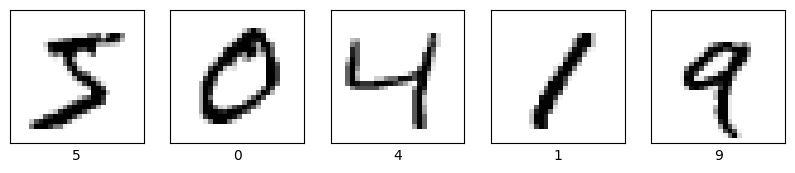

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Display a small number of images
num_images = 5
plt.figure(figsize=(10, 3))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

* The sharpened images

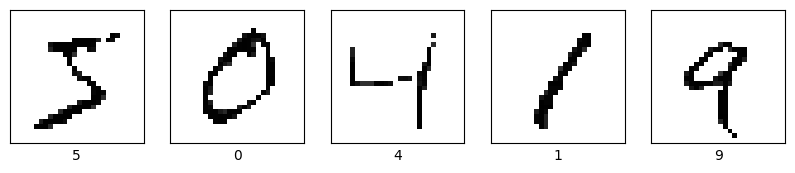

In [7]:
# Display a small number of images
num_images = 5
plt.figure(figsize=(10, 3))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_filtered[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

* Now let's train a CNN using the sharpened data set

In [8]:
# Scale the data
x_train_filtered = x_train_filtered / 255
x_test_filtered = x_test_filtered / 255

# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train_filtered, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test_filtered, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

del x_train
del x_test
del x_train_filtered
del x_test_filtered

Epoch 1/5
844/844 [==============================] - 14s 16ms/step - loss: 0.2144 - accuracy: 0.9340 - val_loss: 0.0680 - val_accuracy: 0.9793
Epoch 2/5
844/844 [==============================] - 19s 23ms/step - loss: 0.0655 - accuracy: 0.9794 - val_loss: 0.0548 - val_accuracy: 0.9845
Epoch 3/5
844/844 [==============================] - 20s 24ms/step - loss: 0.0474 - accuracy: 0.9843 - val_loss: 0.0443 - val_accuracy: 0.9865
Epoch 4/5
844/844 [==============================] - 17s 20ms/step - loss: 0.0362 - accuracy: 0.9886 - val_loss: 0.0479 - val_accuracy: 0.9853
Epoch 5/5
844/844 [==============================] - 16s 19ms/step - loss: 0.0282 - accuracy: 0.9905 - val_loss: 0.0400 - val_accuracy: 0.9893
313/313 - 1s - loss: 0.0367 - accuracy: 0.9875 - 891ms/epoch - 3ms/step

Test accuracy: 0.987500011920929


## Improving Accuracy with Differing Architectures

* First we will test the addition of regularization and drop-out to the CNN
    * Regularization: Using L1 or L2 norms to control the values of the weights of the network (like LASSO and Ridge regresion)
    * Dropout: randomly setting X% of the weights of a layer to zero
* Both methods can reduce overfitting and thus increase accuracy

In [9]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = np.expand_dims(x_train, axis=-1) / 255.0
x_test = np.expand_dims(x_test, axis=-1) / 255.0

# Create a CNN model with regularization and dropout
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train,
          batch_size=128,
          epochs=5,
          verbose=1,
          validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

del x_train
del x_test


Epoch 1/5
469/469 [==============================] - 10s 22ms/step - loss: 0.8699 - accuracy: 0.8493 - val_loss: 0.4825 - val_accuracy: 0.9365
Epoch 2/5
469/469 [==============================] - 10s 20ms/step - loss: 0.6088 - accuracy: 0.8964 - val_loss: 0.4464 - val_accuracy: 0.9461
Epoch 3/5
469/469 [==============================] - 10s 21ms/step - loss: 0.5610 - accuracy: 0.9080 - val_loss: 0.4134 - val_accuracy: 0.9509
Epoch 4/5
469/469 [==============================] - 10s 21ms/step - loss: 0.5302 - accuracy: 0.9152 - val_loss: 0.4005 - val_accuracy: 0.9544
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.4048 - accuracy: 0.9551
Test accuracy: 0.9550999999046326


* Ensemble Learning: Train many CNNs and take the average of the CNNS to be the result
    * Also used to reduce overfitting and capture various patterns in the data
* The ensemble can be made of CNNs of the same architecture (this example) or different architectures

In [11]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = np.expand_dims(x_train, axis=-1) / 255.0
x_test = np.expand_dims(x_test, axis=-1) / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Create multiple CNN models
num_models = 5
models = []

for i in range(num_models):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    models.append(model)

# Train the models
for model in models:
    model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=0)
# Combine predictions from the models

y_preds = np.zeros_like(y_test)

for model in models:
    y_preds += model.predict(x_test)

y_preds /= num_models

# Evaluate the ensemble model
ensemble_loss, ensemble_acc = model.evaluate(x_test, y_test)
print(f'Ensemble test accuracy: {ensemble_acc}')


del x_train
del x_test

313/313 [==============================] - 1s 2ms/step - loss: 0.0429 - accuracy: 0.9842
Ensemble test accuracy: 0.9842000007629395


### More Complex Architecture
* Inception Networks, ResNet, DeepNet
    * Improve computational effeciency with smaller parallel layers instead of larger layers
* Can train the networks using Google's ImageNet weights (transfer learning)
* Not useful (in fact not appliciable) the MNIST data set but work well on larger image dta sets